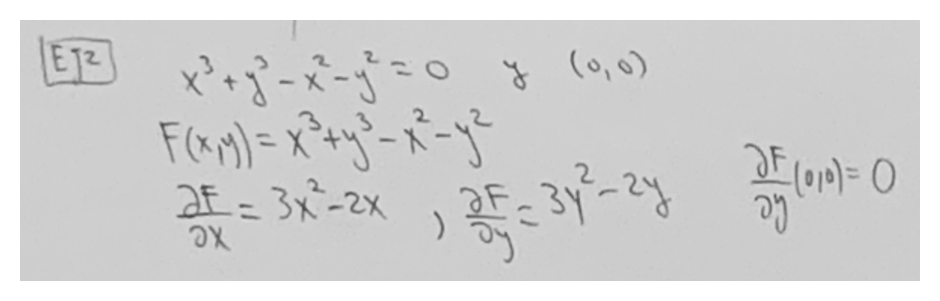

shape: (418, 1440)
min: 0.2586
max: 0.8706


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('submatrix + borders/imagen13.png')
image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

mpimg.imsave('submatrix + borders/image13_grayscale.png', image, cmap='gray')
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()
print(f'shape: {image.shape}')
print(f'min: {round(image.min(), 4)}')
print(f'max: {round(image.max(), 4)}')

In [2]:
# valor más repetido
def mas_repetido(image, value=None, delta=None):   # value: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if value == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif value == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep

In [3]:
# Detectar si es similar a rep
def rep_to_color(valor, rep, delta):
    if abs(valor - rep) <= delta: return True
    else: return False

In [4]:
# dividir matriz en sub matrices
def dividir(matrix, n):
    sub_matrices = []
    
    for i in range(0, matrix.shape[0], n):
        for j in range(0, matrix.shape[1], n):
            submatriz = matrix[i:i+n, j:j+n]
            sub_matrices.append(submatriz)
    return sub_matrices

In [5]:
# cambiar color mas oscuro y mas repetido (texto) a negro
def toBlack(image, delta1, delta2):
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0
    return image

In [6]:
# suponiendo que todos los oscuros ya se convirtieron a 0, convertir todo el resto en 1
def toWhite(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
    return image

In [7]:
# imagenes sin texto transformarlas a blanco
def blank(image):
    if np.all(image == 0):
        image = np.ones(image.shape)
    return image

In [8]:
def func(image, delta1, delta2):
    # toBlack
    rep = mas_repetido(image, 'min', delta1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if rep_to_color(image[i, j], rep, delta2):
                image[i, j] = 0

    # toWhite
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] != 0:
                image[i, j] = 1
                
    # blank
    if np.all(image == 0):
        image = np.ones(image.shape)
        
    return image

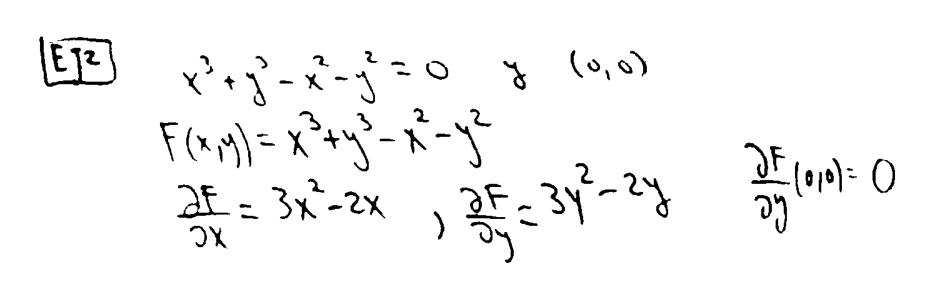

In [9]:
dim = 200
sub_images = dividir(image, dim)

images = []
for i in range(len(sub_images)):
    imagen = func(sub_images[i], 0.05, 0.3)
    images.append(imagen)
    

n_row = int(np.ceil(image.shape[0]/dim))
n_col = int(np.ceil(image.shape[1]/dim))

stacked_rows = []
m = 1
for i in range(n_row):
    stack_row = np.hstack(images[(n_col*i):n_col*m])
    stacked_rows.append(stack_row)
    m += 1

stacked = np.vstack(stacked_rows)

mpimg.imsave('submatrix + borders/image13_stacked.png', stacked, cmap='gray')
plt.imshow(stacked, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()

---
#### Borders

In [10]:
# definir tono actual
def tono(valor, delta, min_rep, max_rep):
    if abs(valor - min_rep) <= delta: return 0
    elif abs(valor - max_rep) <= delta: return 1

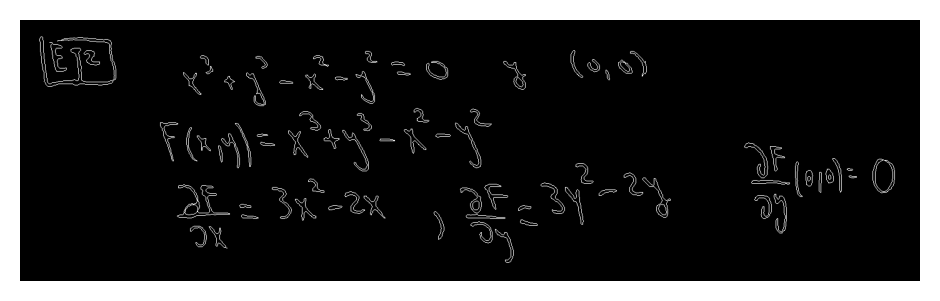

In [11]:
mask = np.zeros(stacked.shape)

min_rep = mas_repetido(stacked, 'min', 0.1)
max_rep = mas_repetido(stacked, 'max', 0.1)

delta = 0.05
delta1 = 0.05

# izquierda -> derecha | arriba -> abajo
for i in range(stacked.shape[0]):
    for j in range(stacked.shape[1] - 1):
        tono_actual = tono(stacked[i,j], delta1, min_rep, max_rep)
        if abs(stacked[i,j] - stacked[i,j+1]) > delta:
            if tono_actual == 1:
                mask[i,j+1] = 1
            elif tono_actual == 0:
                mask[i,j] = 1
                
# arriba -> abajo | izquierda -> derecha
for j in range(stacked.shape[1]):
    for i in range(stacked.shape[0] - 1):
        tono_actual = tono(stacked[i,j], delta1, min_rep, max_rep)
        if abs(stacked[i,j] - stacked[i+1,j]) > delta:
            if tono_actual == 1:
                mask[i+1,j] = 1
            elif tono_actual == 0:
                mask[i,j] = 1
                
mpimg.imsave('submatrix + borders/image13_borders.png',  mask, cmap='gray')
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.tight_layout()
plt.show()